In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf  
https://www.kaggle.com/datasets/tristan581/all-55000-games-on-steam-november-2022?select=steam_games.csv

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Структуры данных/Графы/steam_games.csv', delimiter=';')

<ipython-input-2-5bdf7c3ce759>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Структуры данных/Графы/steam_games.csv', delimiter=';')


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Графы/steam_games.csv', delimiter=';')

In [3]:
pd.set_option('display.max_columns', 50)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55691 entries, 0 to 55690
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   App ID             55691 non-null  int64 
 1   Name               55691 non-null  object
 2   Short Description  55654 non-null  object
 3   Developer          55562 non-null  object
 4   Publisher          55540 non-null  object
 5   Genre              55530 non-null  object
 6   Tags               55556 non-null  object
 7   Type               55691 non-null  object
 8   Categories         54721 non-null  object
 9   Owners             55691 non-null  object
 10  Positive Reviews   55691 non-null  int64 
 11  Negative Reviews   55691 non-null  int64 
 12  Price              55691 non-null  int64 
 13  Initial Price      55691 non-null  int64 
 14  Discount           55691 non-null  int64 
 15  CCU                55691 non-null  int64 
 16  Languages          55680 non-null  objec

In [4]:
data.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",201215,5199,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",27,5,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",4032,646,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",1575,115,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",0,1,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [5]:
data.Type.unique()

array(['game', 'hardware'], dtype=object)

In [6]:
data.Type.value_counts(normalize=True)

game        0.999982
hardware    0.000018
Name: Type, dtype: float64

In [7]:
for i in range(len(data['Type'])):
  if data['Type'][i] != 'game':
    data = data.drop([i])

In [8]:
data.columns

Index(['App ID', 'Name', 'Short Description', 'Developer', 'Publisher',
       'Genre', 'Tags', 'Type', 'Categories', 'Owners', 'Positive Reviews',
       'Negative Reviews', 'Price', 'Initial Price', 'Discount', 'CCU',
       'Languages', 'Platforms', 'Release Date', 'Required Age', 'Website',
       'Header Image'],
      dtype='object')

In [9]:
data = data.drop(columns=['Header Image', 'Website', 'Discount', 'Initial Price', 'App ID', 'Owners', ])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55690 entries, 0 to 55690
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               55690 non-null  object
 1   Short Description  55653 non-null  object
 2   Developer          55562 non-null  object
 3   Publisher          55539 non-null  object
 4   Genre              55530 non-null  object
 5   Tags               55555 non-null  object
 6   Type               55690 non-null  object
 7   Categories         54720 non-null  object
 8   Positive Reviews   55690 non-null  int64 
 9   Negative Reviews   55690 non-null  int64 
 10  Price              55690 non-null  int64 
 11  CCU                55690 non-null  int64 
 12  Languages          55680 non-null  object
 13  Platforms          55690 non-null  object
 14  Release Date       55591 non-null  object
 15  Required Age       55690 non-null  object
dtypes: int64(4), object(12)
memory usage: 9.

In [11]:
data.columns

Index(['Name', 'Short Description', 'Developer', 'Publisher', 'Genre', 'Tags',
       'Type', 'Categories', 'Positive Reviews', 'Negative Reviews', 'Price',
       'CCU', 'Languages', 'Platforms', 'Release Date', 'Required Age'],
      dtype='object')

In [12]:
data = data.dropna()

In [13]:
data.head()

,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Positive Reviews,Negative Reviews,Price,CCU,Languages,Platforms,Release Date,Required Age
0,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...",201215,5199,999,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0
1,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...",27,5,999,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0
2,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...",4032,646,599,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0
3,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...",1575,115,1999,76,English,"windows, mac",2020/10/14,0
4,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,0,1,199,0,Simplified Chinese,windows,2019/03/30,0


In [14]:
data.index = [i for i in range(data.shape[0])]

Убираем игры, где в столбце Languages нет English

In [15]:
for i in range(len(data['Languages'])):
  # a = str(data['Languages'][i])
  if "English" in str(data['Languages'][i]):
    continue
  else:
    data = data.drop([i])

In [16]:
data = data.dropna()

In [17]:
data['Developer'] = data['Developer'].astype('str')
data['Publisher'] = data['Publisher'].astype('str')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53634 entries, 0 to 54184
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               53634 non-null  object
 1   Short Description  53634 non-null  object
 2   Developer          53634 non-null  object
 3   Publisher          53634 non-null  object
 4   Genre              53634 non-null  object
 5   Tags               53634 non-null  object
 6   Type               53634 non-null  object
 7   Categories         53634 non-null  object
 8   Positive Reviews   53634 non-null  int64 
 9   Negative Reviews   53634 non-null  int64 
 10  Price              53634 non-null  int64 
 11  CCU                53634 non-null  int64 
 12  Languages          53634 non-null  object
 13  Platforms          53634 non-null  object
 14  Release Date       53634 non-null  object
 15  Required Age       53634 non-null  object
dtypes: int64(4), object(12)
memory usage: 9.

In [19]:
data.index = [i for i in range(data.shape[0])]

In [20]:
genre_set = set()
for i in range(len(data.Genre.unique())):
  for j in data.Genre.unique()[i].split(', '):
    genre_set.add(j)
# genre_set

In [21]:
len(genre_set)

28

In [22]:
for g in genre_set:
  data[g] = np.zeros(len(data.Genre)).astype('bool')
data.head(1)

,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Positive Reviews,Negative Reviews,Price,CCU,Languages,Platforms,Release Date,Required Age,Education,Photo Editing,Free to Play,Gore,Simulation,RPG,Audio Production,Animation & Modeling,Massively Multiplayer,Design & Illustration,Early Access,Web Publishing,Sexual Content,Software Training,Adventure,Sports,Action,Utilities,Indie,Violent,Game Development,Strategy,Movie,Racing,Nudity,Casual,Video Production,Accounting
0,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...",201215,5199,999,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
data.columns[16:44]

Index(['Education', 'Photo Editing', 'Free to Play', 'Gore', 'Simulation',
       'RPG', 'Audio Production', 'Animation & Modeling',
       'Massively Multiplayer', 'Design & Illustration', 'Early Access',
       'Web Publishing', 'Sexual Content', 'Software Training', 'Adventure',
       'Sports', 'Action', 'Utilities', 'Indie', 'Violent', 'Game Development',
       'Strategy', 'Movie', 'Racing', 'Nudity', 'Casual', 'Video Production',
       'Accounting'],
      dtype='object')

In [24]:
genre_set = list(genre_set)

In [25]:
for i in range(len(data.Genre)):
  for j in genre_set:
    if j in data.iloc[i, 4]:
      data.loc[i, j] = True

In [26]:
data.index = [i for i in range(data.shape[0])]

In [27]:
for i in range(len(data.Publisher)):
  if data.iloc[i, 2] in data.iloc[i, 3] and ", " in data.iloc[i, 3] and data.iloc[i, 2] != data.iloc[i, 3]:
    pub_list = data.iloc[i, 3].split(', ')
    for j in range(len(pub_list)-1):
      pub_list[j] = pub_list[j].strip()
      if pub_list[j].startswith(data.iloc[i, 2]):
        pub_list.remove(pub_list[j])
    data.iloc[i, 3] = ", ".join(pub_list)

In [28]:
pd.set_option('display.max_columns', 50)
data.head()

,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Positive Reviews,Negative Reviews,Price,CCU,Languages,Platforms,Release Date,Required Age,Education,Photo Editing,Free to Play,Gore,Simulation,RPG,Audio Production,Animation & Modeling,Massively Multiplayer,Design & Illustration,Early Access,Web Publishing,Sexual Content,Software Training,Adventure,Sports,Action,Utilities,Indie,Violent,Game Development,Strategy,Movie,Racing,Nudity,Casual,Video Production,Accounting
0,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...",201215,5199,999,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...",27,5,999,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False
2,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...",4032,646,599,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False
3,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...",1575,115,1999,76,English,"windows, mac",2020/10/14,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
4,Zengeon,Zengeon is an anime infused Action RPG and Rog...,IndieLeague Studio,2P Games,"Action, Adventure, Indie, RPG","Action: 138, Indie: 128, RPG: 121, Adventure: ...",game,"Multi-player, Single-player, Steam Achievement...",1018,462,799,3,"Simplified Chinese, English, Traditional Chine...","windows, mac",2019/06/24,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False


In [29]:
data["Total Reviews"] = [data.iloc[i, 8] + data.iloc[i, 9] for i in range(data.shape[0])]

In [30]:
data.shape

(53634, 45)

In [31]:
data.index = [i for i in range(data.shape[0])]

In [32]:
data['Total Reviews'][1]

32

In [33]:
for i in range(len(data['Total Reviews']) - 1):
  if data['Total Reviews'][i] <= 1000:
    data = data.drop([i])

In [34]:
data.shape

(5188, 45)

In [35]:
pd.set_option('display.max_columns', 50)
data.head()

,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Positive Reviews,Negative Reviews,Price,CCU,Languages,Platforms,Release Date,Required Age,Education,Photo Editing,Free to Play,Gore,Simulation,RPG,Audio Production,Animation & Modeling,Massively Multiplayer,Design & Illustration,Early Access,Web Publishing,Sexual Content,Software Training,Adventure,Sports,Action,Utilities,Indie,Violent,Game Development,Strategy,Movie,Racing,Nudity,Casual,Video Production,Accounting,Total Reviews
0,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...",201215,5199,999,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,206414
2,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...",4032,646,599,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,4678
3,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...",1575,115,1999,76,English,"windows, mac",2020/10/14,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,1690
4,Zengeon,Zengeon is an anime infused Action RPG and Rog...,IndieLeague Studio,2P Games,"Action, Adventure, Indie, RPG","Action: 138, Indie: 128, RPG: 121, Adventure: ...",game,"Multi-player, Single-player, Steam Achievement...",1018,462,799,3,"Simplified Chinese, English, Traditional Chine...","windows, mac",2019/06/24,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,1480
8,Hellish Quart,"A physics-based, realistic, 3D sword dueling g...",Kubold,Kubold,"Action, Early Access","Early Access: 222, 3D Fighter: 201, Swordplay:...",game,"Multi-player, Single-player, Shared/Split Scre...",4031,315,1699,59,"English, Simplified Chinese",windows,2021/02/16,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,4346


In [36]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Структуры данных/Графы/prepared_data.csv', sep=';')

In [37]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Структуры данных/Графы/prepared_data.csv', sep=';')
data = data.drop(columns=["Unnamed: 0"], axis=1)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Графы/prepared_data.csv', sep=';')
data = data.drop(columns=["Unnamed: 0"], axis=1)

In [38]:
data= data.dropna()
data.index = [i for i in range(data.shape[0])]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5187 entries, 0 to 5186
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   5187 non-null   object
 1   Short Description      5187 non-null   object
 2   Developer              5187 non-null   object
 3   Publisher              5187 non-null   object
 4   Genre                  5187 non-null   object
 5   Tags                   5187 non-null   object
 6   Type                   5187 non-null   object
 7   Categories             5187 non-null   object
 8   Positive Reviews       5187 non-null   int64 
 9   Negative Reviews       5187 non-null   int64 
 10  Price                  5187 non-null   int64 
 11  CCU                    5187 non-null   int64 
 12  Languages              5187 non-null   object
 13  Platforms              5187 non-null   object
 14  Release Date           5187 non-null   object
 15  Required Age         

In [39]:
data = data.drop(columns=["Game Development"])
data = data.drop(columns=["Animation & Modeling"])
data = data.drop(columns=["Web Publishing"])
# data = data.drop(columns=["Sexual Content"])
data = data.drop(columns=["Audio Production"])
data = data.drop(columns=["Photo Editing"])
data = data.drop(columns=["Utilities"])
# data = data.drop(columns=["Early Access"])
data = data.drop(columns=["Design & Illustration"])
data = data.drop(columns=["Accounting"])
# data = data.drop(columns=["Gore"])
data = data.drop(columns=["Education"])
# data = data.drop(columns=["Violent"])
data = data.drop(columns=["Movie"])
data = data.drop(columns=["Software Training"])
# data = data.drop(columns=["Free to Play"])
data = data.drop(columns=["Video Production"])
# data = data.drop(columns=["Nudity"])

In [40]:
data.columns

Index(['Name', 'Short Description', 'Developer', 'Publisher', 'Genre', 'Tags',
       'Type', 'Categories', 'Positive Reviews', 'Negative Reviews', 'Price',
       'CCU', 'Languages', 'Platforms', 'Release Date', 'Required Age',
       'Free to Play', 'Gore', 'Simulation', 'RPG', 'Massively Multiplayer',
       'Early Access', 'Sexual Content', 'Adventure', 'Sports', 'Action',
       'Indie', 'Violent', 'Strategy', 'Racing', 'Nudity', 'Casual',
       'Total Reviews'],
      dtype='object')

In [41]:
data.head()

,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Positive Reviews,Negative Reviews,Price,CCU,Languages,Platforms,Release Date,Required Age,Free to Play,Gore,Simulation,RPG,Massively Multiplayer,Early Access,Sexual Content,Adventure,Sports,Action,Indie,Violent,Strategy,Racing,Nudity,Casual,Total Reviews
0,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...",201215,5199,999,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,206414
1,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...",4032,646,599,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,4678
2,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...",1575,115,1999,76,English,"windows, mac",2020/10/14,0,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,1690
3,Zengeon,Zengeon is an anime infused Action RPG and Rog...,IndieLeague Studio,2P Games,"Action, Adventure, Indie, RPG","Action: 138, Indie: 128, RPG: 121, Adventure: ...",game,"Multi-player, Single-player, Steam Achievement...",1018,462,799,3,"Simplified Chinese, English, Traditional Chine...","windows, mac",2019/06/24,0,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,1480
4,Hellish Quart,"A physics-based, realistic, 3D sword dueling g...",Kubold,Kubold,"Action, Early Access","Early Access: 222, 3D Fighter: 201, Swordplay:...",game,"Multi-player, Single-player, Shared/Split Scre...",4031,315,1699,59,"English, Simplified Chinese",windows,2021/02/16,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,4346


In [42]:
data.columns

Index(['Name', 'Short Description', 'Developer', 'Publisher', 'Genre', 'Tags',
       'Type', 'Categories', 'Positive Reviews', 'Negative Reviews', 'Price',
       'CCU', 'Languages', 'Platforms', 'Release Date', 'Required Age',
       'Free to Play', 'Gore', 'Simulation', 'RPG', 'Massively Multiplayer',
       'Early Access', 'Sexual Content', 'Adventure', 'Sports', 'Action',
       'Indie', 'Violent', 'Strategy', 'Racing', 'Nudity', 'Casual',
       'Total Reviews'],
      dtype='object')

In [43]:
data.columns[16:32].__len__()

16

In [44]:
genre_list = list(data.columns[16:32])

In [45]:
genre_list

['Free to Play',
 'Gore',
 'Simulation',
 'RPG',
 'Massively Multiplayer',
 'Early Access',
 'Sexual Content',
 'Adventure',
 'Sports',
 'Action',
 'Indie',
 'Violent',
 'Strategy',
 'Racing',
 'Nudity',
 'Casual']

In [46]:
#for i in range(len(genre_set)):
matrix = [[i for i in np.c_[np.array(data.loc[0:, data.columns[0]]), data.loc[0:, data.columns[j]]] if i[1] == True] for j in range(16, 32)]

In [47]:
len(matrix)

16

In [48]:
matrix[0][0]

array(['Touhou Fantasia / 东方梦想曲', True], dtype=object)

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

In [50]:
G = nx.Graph()

In [51]:
edge_colors = ['aqua', 'khaki', 'darkred', 'blue', 'blueviolet', 'gold', 'brown', 'peru', 'aqua', 'burlywood', 'tan', 'maroon', 'chocolate', 'b', 'coral', 'crimson', 'darkgreen', 'lime', 'olive', 'darkseagreen', 'deeppink', 'lavender', 'yellowgreen', 'greenyellow', 'indigo', 'darkkhaki', 'lightcoral', 'lightslateblue']
genre_set = list(data.columns[16:32])
# genre_set

In [52]:
len(edge_colors)

28

In [53]:
for i in range(len(matrix) - 1):
  for j in range(len(matrix[i]) - 1):
    if (len(matrix[i]) - 1) < 2:
      G.add_node(matrix[i][j][0])
    else:
      for z in range(j + 1, len(matrix[i]) - 1):
        G.add_edge(matrix[i][j][0], 
                   matrix[i][z][0], 
                   color = edge_colors[i], 
                   genre = genre_set[i])


In [54]:
colors = [G[u][v]['color'] for u,v in G.edges()]
# edge_colors = ['blue', 'red', 'green', 'orange']

In [65]:
def nonedges(G, u):
  for v in nx.neighbors(G, u):
    yield(u, v)

In [83]:
data.loc[data['Name'] == "RimWorld"]

,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Positive Reviews,Negative Reviews,Price,CCU,Languages,Platforms,Release Date,Required Age,Free to Play,Gore,Simulation,RPG,Massively Multiplayer,Early Access,Sexual Content,Adventure,Sports,Action,Indie,Violent,Strategy,Racing,Nudity,Casual,Total Reviews
2296,RimWorld,A sci-fi colony sim driven by an intelligent A...,Ludeon Studios,Ludeon Studios,"Indie, Simulation, Strategy","Colony Sim: 3375, Base-Building: 3296, Surviva...",game,"Single-player, Steam Cloud, Steam Workshop, Re...",142201,2550,3499,52984,"English, French, German, Polish, Russian, Ital...","windows, mac, linux",2018/10/17,0,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,144751


In [84]:
game = "RimWorld"
pred = list(nx.adamic_adar_index(G, nonedges(G, game)))
pred = [list(i) for i in pred]

In [147]:
for u, v, p in pred:
  print(f"{u}, {v}, {p}")

In [85]:
pred.sort(reverse=True, key=lambda x: x[2])

In [86]:
pred = [i for i in pred[::100]]

In [87]:
pred[0:5]

[['RimWorld', 'EmergeNYC', 452.98195963709134],
 ['RimWorld', 'Insanity Clicker', 452.9806013554527],
 ['RimWorld', 'Mashinky', 452.9774865405244],
 ['RimWorld', 'Weedcraft Inc', 452.97732285168104],
 ['RimWorld', 'Sang-Froid - Tales of Werewolves', 429.4282072799981]]

In [88]:
len(pred)

37

In [89]:
max = pred[0][2]
min = pred[-1][2]
for i in range(len(pred)):
  pred[i][2] = (pred[i][2] - min)/(max-min)

In [90]:
g = nx.Graph()
nsizes = [1]
sm = 3000

for i, j, s in pred:
  g.add_edge(i, j, node_size=s)
  nsizes.append((s**3)*sm)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23492 (\N{CJK UNIFIED IDEOGRAPH-5BC4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23621 (\N{CJK UNIFIED IDEOGRAPH-5C45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38533 (\N{CJK UNIFIED IDEOGRAPH-9685}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24618 (\N{CJK UNIFIED IDEOGRAPH-602A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22855 (\N{CJK UNIFIED IDEOGRAPH-5947}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

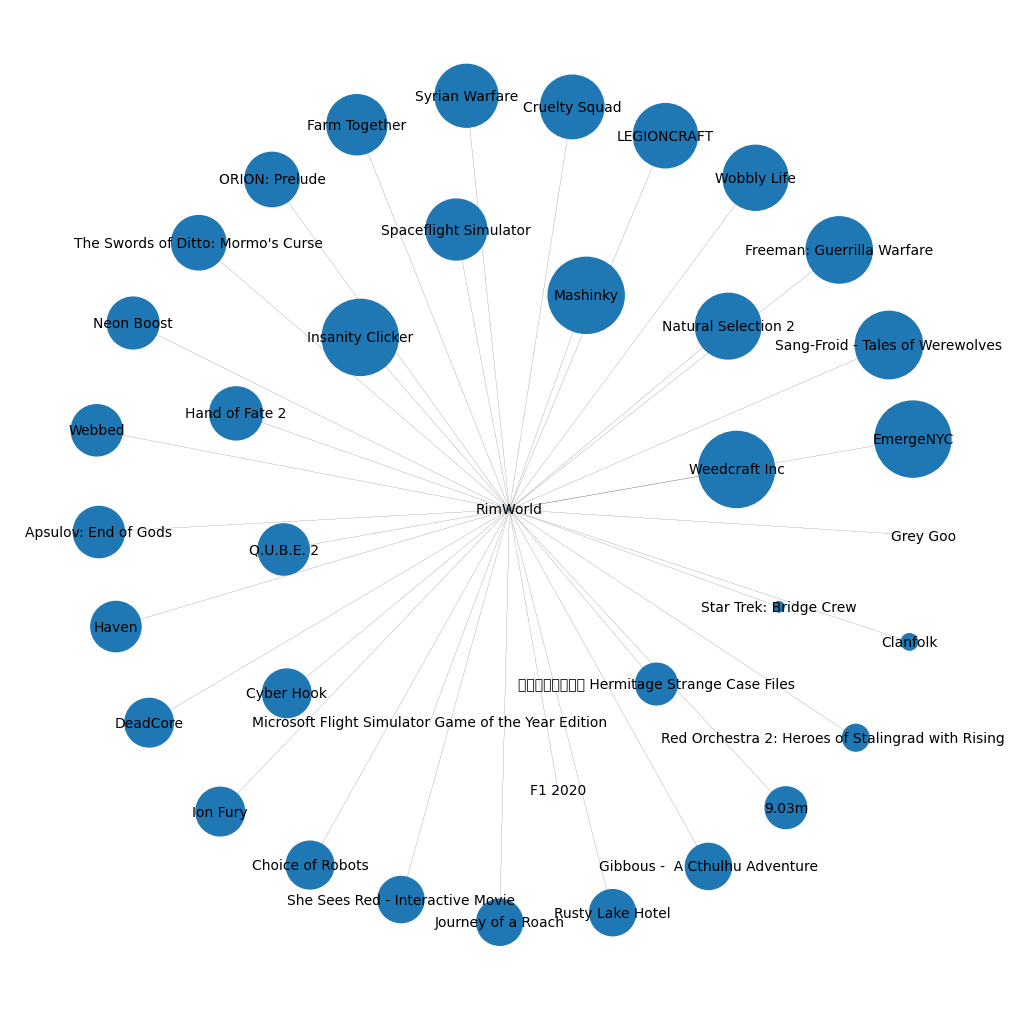

In [91]:
plt.figure(1,figsize=(10,10)) 
nx.draw(g, pos=nx.kamada_kawai_layout(g), with_labels = True, node_size=nsizes, font_size=10, width=0.1)
plt.show()

In [ ]:
# for i in range(10):
#   G.add_node(data.iloc[i,0])
# G.nodes

In [100]:
len(G.edges)

20242

In [101]:
len(set(G.edges))

20242

In [102]:
set(G.edges(['PARQUET']))

set()

In [ ]:
# G = nx.Graph()
# G.add_node("A")
# G.add_node("B")
# G.add_node("C")
# G.add_edge("A", "B")
# G.add_edge("A", "B")
# nx.draw(G)

In [ ]:
# G.edges

In [ ]:
l = data['Tags'][0].split(", ")
l = [i.split(": ")[0] for i in l]
# l = [[i[0], int(i[1])] for i in l]
l

In [ ]:
tags = set()
for i in data['Tags']:
  l = i.split(", ")
  l = [j.split(": ") for j in l]
  for t in l:
    tags.add(t[0])